In [1]:
!pip install kaggle pandas scikit-learn matplotlib

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

c:\Users\haris\OneDrive\Desktop\Projects\Credit_Card_Fraud_Detection\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 66.0M/66.0M [00:37<00:00, 1.85MB/s]

Extracting files...


Path to dataset files: C:\Users\haris\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [7]:
data = pd.read_csv(r"C:\Users\haris\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3\creditcard.csv")

dataframe =  pd.DataFrame(data)
print(dataframe.head())
print(dataframe.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [8]:
features = dataframe.drop(columns=['Class'])  # Keep features only

scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(df_scaled, columns=features.columns)

In [9]:
tsne = TSNE(n_components=2, perplexity=5, random_state = 42)
data_tsne = tsne.fit_transform(df_scaled)

dataframe_tsne = pd.DataFrame(data_tsne,columns=['tsne1','tsne2'])
print(dataframe_tsne.head())

        tsne1      tsne2
0  -29.997362 -12.058802
1  -81.404610 -88.109238
2  102.608009 -10.956113
3   79.377602  -9.269884
4  -52.427818  -3.792945


In [10]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(dataframe_tsne)

dataframe['Cluster'] =  dbscan.labels_

print(dataframe.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   

        V27       V28  Amount  C

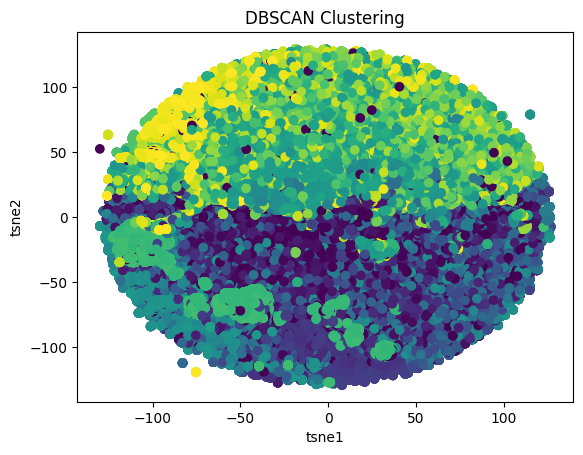

In [11]:
plt.scatter(dataframe_tsne['tsne1'], dataframe_tsne['tsne2'], c=dataframe['Cluster'], cmap='viridis')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.title('DBSCAN Clustering')
plt.show()

In [12]:
pd.crosstab(dataframe['Cluster'], dataframe['Class'])
# This will show the distribution of clusters with respect to the actual class labels

Class,0,1
Cluster,,
-1,6875,24
0,877,0
1,27,0
2,26,0
3,18,0
...,...,...
9802,3,0
9803,6,0
9804,7,0


In [14]:
# Class = 0 (non-fraud) and Class = 1 (fraud)
# The crosstab will help us understand how well the clustering algorithm has separated the fraudulent transactions from the non-fraudulent ones.

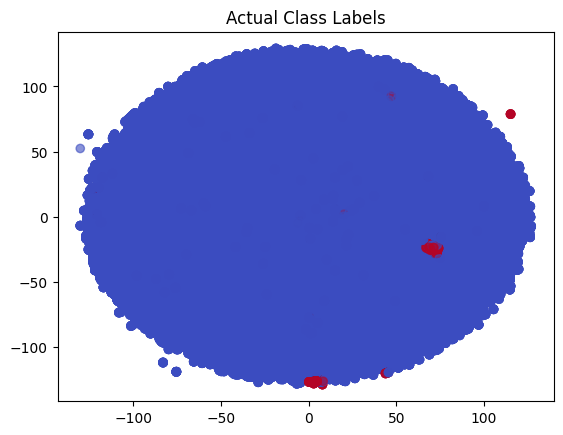

In [13]:
plt.scatter(dataframe_tsne['tsne1'], dataframe_tsne['tsne2'], c=dataframe['Class'], cmap='coolwarm', alpha=0.6)
plt.title("Actual Class Labels")
plt.show()
# This will show the distribution of actual class labels in the t-SNE space